In [1]:
from Business.constants import MagicString
from Business.business_logic_general import General

In [2]:
Datos = General.leer_datos_csv(MagicString.CUSTOMERS_RUTA)

In [3]:
General.realizar_lectura_datos_analisis(Datos, 20)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [4]:
General.describir_datos_csv(Datos)

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
Datos.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
Datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


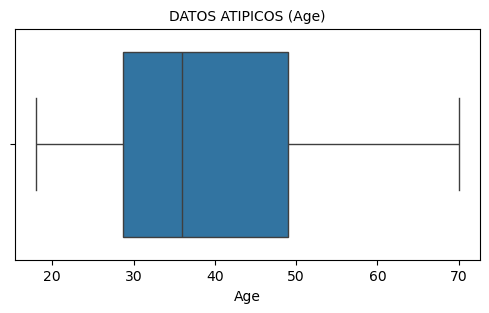

In [7]:
General.graficar_datos_atipicos(Datos, MagicString.CUSTOMER_HEADER_AGE)

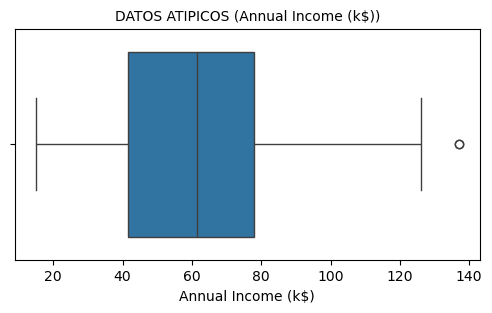

In [8]:
General.graficar_datos_atipicos(Datos, MagicString.CUSTOMER_HEADER_INCOME_ANNUAL)

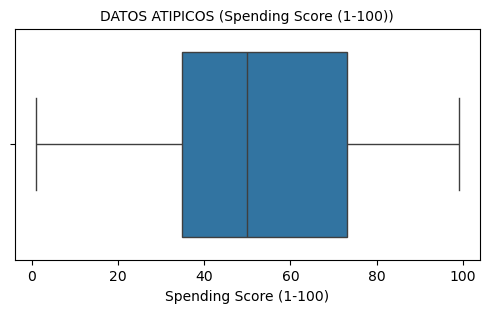

In [9]:
General.graficar_datos_atipicos(Datos, MagicString.CUSTOMER_HEADER_SPENDING)

In [10]:
Datos_Estudio = Datos.copy()

#Modifico la columna de Genero ya que es un dato que lo considero importante
Datos_Estudio[MagicString.CUSTOMER_HEADER_GENDER] = General.modificar_columna_genero(Datos_Estudio, MagicString.CUSTOMER_HEADER_GENDER)

# Realizo imputacion de datos atipicos para la columna Income Annual.
Datos_Estudio[MagicString.CUSTOMER_HEADER_INCOME_ANNUAL] = General.realizar_imputacion_de_datos_para_datos_atipicos(Datos, MagicString.CUSTOMER_HEADER_INCOME_ANNUAL)

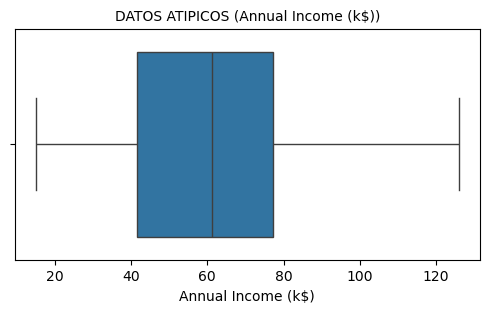

In [11]:
General.graficar_datos_atipicos(Datos_Estudio, MagicString.CUSTOMER_HEADER_INCOME_ANNUAL)

In [12]:
General.describir_datos_csv(Datos_Estudio)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,1.560000,38.850000,59.805000,50.200000
std,57.879185,0.497633,13.969007,25.110699,25.823522
min,1.000000,1.000000,18.000000,15.000000,1.000000
25%,50.750000,1.000000,28.750000,41.500000,34.750000
50%,100.500000,2.000000,36.000000,61.250000,50.000000
75%,150.250000,2.000000,49.000000,77.250000,73.000000
max,200.000000,2.000000,70.000000,126.000000,99.000000


In [13]:
# Agrupar datos Por Edad, Ingreso Anual, Porcentaje de gasto
Datos_Group = Datos_Estudio[[MagicString.CUSTOMER_HEADER_AGE,MagicString.CUSTOMER_HEADER_INCOME_ANNUAL,MagicString.CUSTOMER_HEADER_SPENDING]]

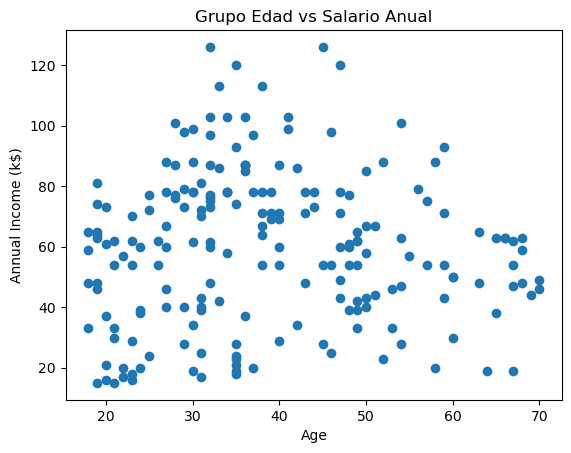

In [14]:
# Grafica de dispersion Edad vs Salario Anual
General.graficar_datos_dispersion(Datos_Estudio, MagicString.CUSTOMER_HEADER_AGE, MagicString.CUSTOMER_HEADER_INCOME_ANNUAL, MagicString.TITLE_GRUPO_SALARIO_EDAD_ANUAL)

In [15]:
# Implementar algoritmo de Hierarchical clustering.
(linked, model) = General.generar_modelo_hierarchical_clustering(Datos_Group)

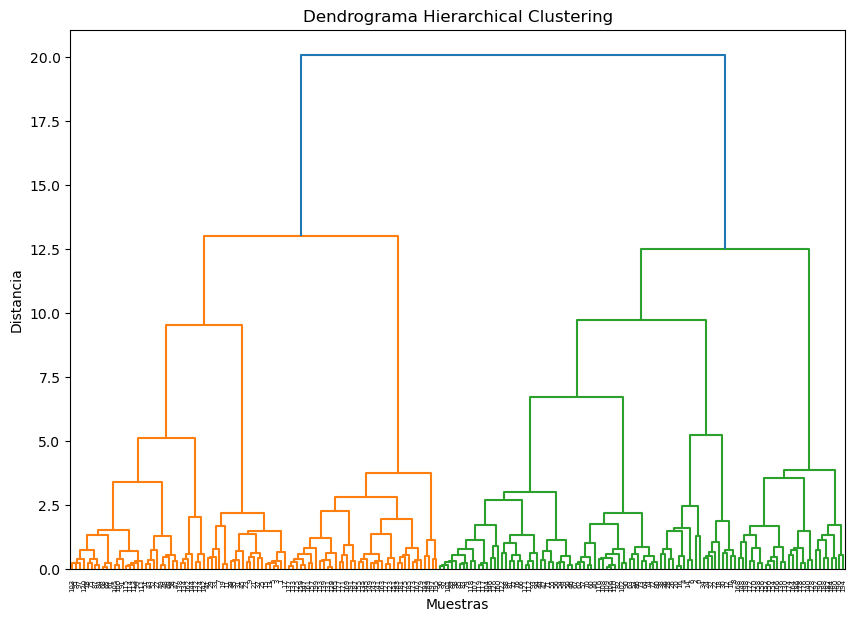

In [16]:
# graficar Dendrograma.
General.graficar_dendrograma(linked)

In [17]:
Datos_Group[MagicString.COLUMNA_GRUPO] = model.labels_

print(MagicString.SEPARADOR_TEXTO_CONSOLA * len(MagicString.TITLE_GRUPO_DATOS))
print(MagicString.TITLE_GRUPO_DATOS)
print(Datos_Group)

Grupo de Datos (Edad, Salario Anual, Porcentaje de gastos)
     Age  Annual Income (k$)  Spending Score (1-100)  Grupo
0     19                15.0                      39      1
1     21                15.0                      81      5
2     20                16.0                       6      1
3     23                16.0                      77      5
4     31                17.0                      40      1
..   ...                 ...                     ...    ...
195   35               120.0                      79      2
196   45               126.0                      28      3
197   32               126.0                      74      2
198   32                61.5                      18      3
199   30                61.5                      83      2

[200 rows x 4 columns]


In [18]:
# Evaluar el desempeño del modelo.
General.evaluar_desempeño_modelo(model, 
                                 Datos_Group, 
                                 MagicString.COLUMNA_GRUPO, 
                                 MagicString.TITLE_DESEMPENO_MODELO)

DESEMPEÑO MODELO (Edad, Salario Anual, Porcentaje gastos)
Cantidad Elementos Evaluados:  200
Coeficiente Silhouette:        0.4372070195012316
Indice Calinski Harabasz:      146.40761015502454
Indice Davies Bouldin:         0.843121932155384


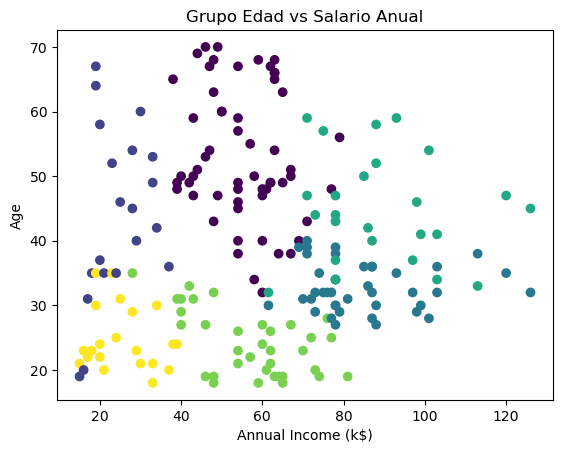

In [19]:
# Grafica de dispersion agrupada
General.grafica_dispersion_agrupada(Datos_Group, 
                                    MagicString.CUSTOMER_HEADER_INCOME_ANNUAL,
                                    MagicString.CUSTOMER_HEADER_AGE, 
                                    MagicString.COLUMNA_GRUPO, 
                                    MagicString.TITLE_GRUPO_SALARIO_EDAD_ANUAL)